# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

Text(0.5, 1.0, 'log(P(Mn == x)) vs time')

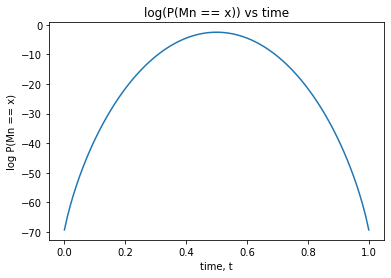

In [ ]:
#let prob of showing heads be p
#let n = total no. of tosses
#let M = total no. of heads in n tosses
#let Mn = avg. number of heads in n tosses
import numpy
import matplotlib.pyplot as plt
#if Mn = x, M = nx , therefore P(Mn == x) = P(nx;n) where 0<x<1
import math
## from scipy.special import comb 
# comb is a function in scipy that helps compute(nCr)
from scipy.special import comb
x = numpy.linspace(0,1,100)

def func(x,n=100,p = 0.5):
  # 0<p<1 0<x<1
    Prb = math.log((comb(n,(n*x))*(p**(n*x))*((1 - p)**(n-(n*x)))))
    return Prb

l1 = []
for i in x:
  l1.append(func(i,100,0.5))

matplotlib.pyplot.plot(x,l1)
matplotlib.pyplot.xlabel('time, t')
matplotlib.pyplot.ylabel('log P(Mn == x)')
matplotlib.pyplot.title('log(P(Mn == x)) vs time')


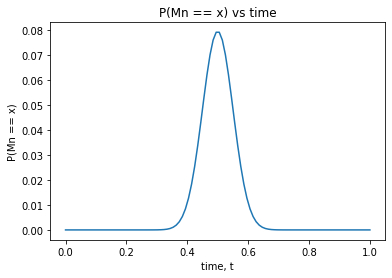

In [ ]:
x = numpy.linspace(0,1,100)

def funct(x,n=100,p = 0.5):
  # 0<p<1 0<x<1
    Prb = (comb(n,(n*x))*(p**(n*x))*((1 - p)**(n-(n*x))))
    return Prb

l2 = []
for i in x:
  l2.append(funct(i,100,0.5))

# as shown here, The graph forms a gaussian distribution at x = 0.5.
# that is, 
plt.plot(x,l2)
matplotlib.pyplot.xlabel('time, t')
matplotlib.pyplot.ylabel('P(Mn == x)')
matplotlib.pyplot.title('P(Mn == x) vs time')

plt.show()


In [ ]:
def gaussian(x,x0,sigma, c):
  return c*numpy.exp((-numpy.power((x-x0),2))/(2*numpy.power(sigma,2)))


Text(0.5, 1.0, 'Gaussian generated vs the probability distribution')

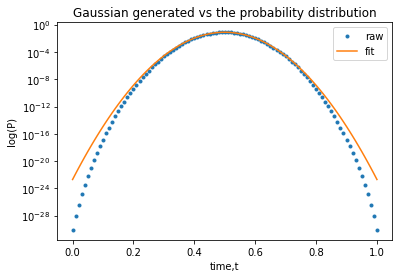

In [ ]:
import matplotlib
import scipy.optimize
import math

n = 100
xdata = [M/n for M in range(n+1)]
p = 0.5
q = 0.5
l1 = []
for M in range (n+1):
    l1.append( scipy.special.binom(n,M)*math.pow(p,M)*math.pow(q,(n-M)) )
popt, pcov = scipy.optimize.curve_fit(gaussian,numpy.array(xdata),numpy.array(l1))
matplotlib.pyplot.semilogy([M/n for M in range(n+1)],l1,'.',label='raw')
matplotlib.pyplot.plot(xdata,gaussian(xdata,*popt),label ='fit')

matplotlib.pyplot.xlabel('time,t')
matplotlib.pyplot.ylabel('log(P)')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('Gaussian generated vs the probability distribution')

# the gaussian plot and the plot generated with the same data overlaps mostly
# these plots coincide mostly at x = 0.5, and deviate slightly from the edges, thus, proving that it is a gaussian at the point x = 1/2


## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Text(0.5, 1.0, 'log(P(Mn > x)) vs n for diff values of x')

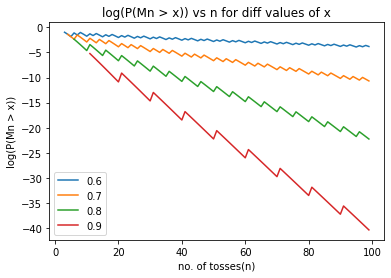

In [ ]:
l1 = [0.6,0.7,0.8,0.9]
for f in l1:
  def functio(x,n=100,p = 0.5):
  # 0<p<1 0<x<1
    Prb = ((comb(n,(n*x))*(p**(n*x))*((1 - p)**(n-(n*x)))))
    return Prb

  Prob_n = []
  for i in range(1,100):
    #print(i)
    sum = 0
    t = range(1,i)
    for j in t:
      if (j/i > f):
        sum += functio(j/i,i,0.5)
    Prob_n.append(numpy.log([sum]))
  
  n = range(1,100)
  plt.plot(n,Prob_n,label = f)
matplotlib.pyplot.xlabel('no. of tosses(n)')
matplotlib.pyplot.ylabel('log(P(Mn > x))')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('log(P(Mn > x)) vs n for diff values of x')

In [ ]:
#As this graph was plotted against x axis containing different values of n(no. of tosses), and y axis which contains the log(Prob Mn>x)
#We make 2 important observations:
# a) Prob(Mn>x) is essentially a function that sums the prob of all the values of x greater than as stated and lesser than 1,
# b) As the value of x increases, the curve slowly move away x axis, eventually aligning with y-axis as the value of x tends to 0.5
# c) As the value of n increases, the slope of the curve becomes more and more negative. eventually tending towards forming a straight 
#    line. The graph develops itself into a straight line for large values of n
# 

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Text(0.5, 1.0, 'Slope(x) vs x')

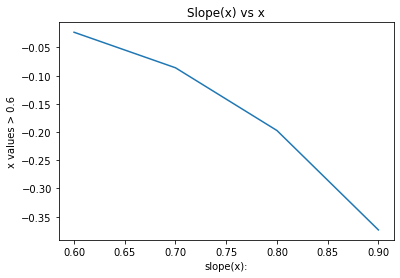

In [ ]:
l1 = numpy.array([0.6,0.7,0.8,0.9])
m2 = []
for f in l1:
  def functio(x,n=100,p = 0.5):
  # 0<p<1 0<x<1
    Prb = ((comb(n,(n*x))*(p**(n*x))*((1 - p)**(n-(n*x)))))
    return Prb

  Prob_n = []
  for i in range(1,1000):
    sum = 0
    t = range(0,i)
    for j in t:
      if (j/i >= f):
        sum += functio(j/i,i,0.5)
    Prob_n.append(numpy.log(sum))
  n = range(1,1000)
  c = 998
  m2.append(Prob_n[c]/c)

plt.plot(l1,m2)
matplotlib.pyplot.xlabel('slope(x):')
matplotlib.pyplot.ylabel('x values > 0.6')
matplotlib.pyplot.title('Slope(x) vs x')

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


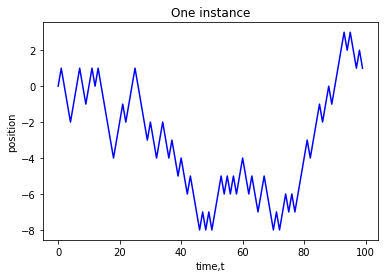

In [ ]:
import random
def rand_walker(n = 100):
  l1 = [0]
  t = range(1,n)
  for i in t:
    step = (2 * (random.uniform(0,1) > 0.5) - 1)
    l1.append((l1[-1] + step))
  return l1

def x_axis(n = 100):
  t1 = range(0,n)
  return t1

no_walkers = 1
time = 100

for i in range(no_walkers):
  plt.plot(x_axis(time),rand_walker(time), color = 'blue')
  matplotlib.pyplot.xlabel('time,t')
  matplotlib.pyplot.ylabel('position')
  matplotlib.pyplot.title('One instance')

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

Text(0.5, 1.0, 'Avg position of the drunk man at a time t')

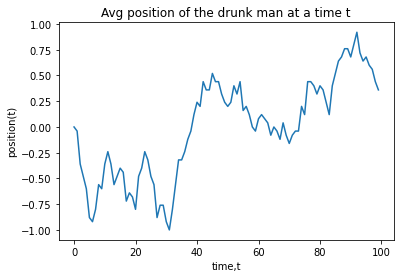

In [ ]:
# make a list of lists with each list showing the position of the drunkard in each instance at aq particular time t
def mk_data(no_walkers = 100, time = 100):
  data_walkers = []
  for i in range(no_walkers):
    data_walkers.append(rand_walker(time)) 
  return data_walkers

#convert the list of lists data_walkers into an array using numpy.array
import numpy
d1 = numpy.array(mk_data(50, 100))
#print(d1)

# to open man for a particular function
#   use syntax ?<function> 

# numpy.sum(<matrix>, <axis>)
# axis = 0(list of column sums), axis = 1(list of row sums)

col_sum = numpy.sum(d1, 0)
#print(col_sum)

avg_position = col_sum/(numpy.shape(d1)[0])
#print(avg_position)
x_axi = (range(0,numpy.shape(d1)[1]))

plt.plot(x_axi, avg_position)
#graph plots the avg position at each instance and time

matplotlib.pyplot.xlabel('time,t')
matplotlib.pyplot.ylabel('position(t)')
matplotlib.pyplot.title('Avg position of the drunk man at a time t')

Text(0.5, 1.0, 'Avg position of the drunk man at a time t')

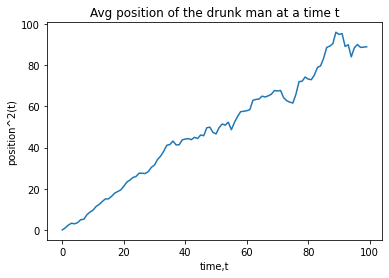

In [ ]:
import random
def rand_walker_sq(n = 100):
  l1 = [0]
  l2 = [0]
  t = range(1,n)
  for i in t:
    step = (2 * (random.uniform(0,1) > 0.5) - 1)
    c = (l2[-1] + step)
    l2.append(c)
    l1.append(c*c)
  return l1

# make a list of lists with each list showing the position of the drunkard in each instance at aq particular time t
def mk_data(no_walkers = 100, time = 100):
  data_walkers = []
  for i in range(no_walkers):
    data_walkers.append(rand_walker_sq(time)) 
  return data_walkers

#convert the list of lists data_walkers into an array using numpy.array
import numpy
d1 = numpy.array(mk_data(50, 100))
#print(d1)

# to open man for a particular function
#   use syntax ?<function> 

# numpy.sum(<matrix>, <axis>)
# axis = 0(list of column sums), axis = 1(list of row sums)

col_sum = numpy.sum(d1, 0)
#print(col_sum)

avg_position = col_sum/(numpy.shape(d1)[0])
#print(avg_position)
x_axi = (range(0,numpy.shape(d1)[1]))

plt.plot(x_axi, avg_position)
#graph plots the avg position at each instance and time
matplotlib.pyplot.xlabel('time,t')
matplotlib.pyplot.ylabel('position^2(t)')
matplotlib.pyplot.title('Avg position of the drunk man at a time t')

In [ ]:
#comment

# We observe here that the average position square is an increasing function, and naturally is always greater than 0
# whereas average position can be positive or negative or zero for that matter.

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

Text(0.5, 1.0, 'Prob that a man is stuck at M at time t')

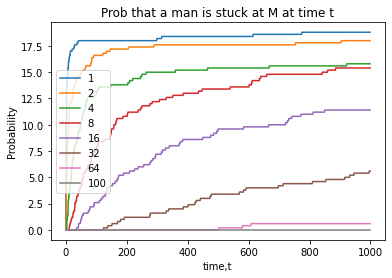

In [ ]:
import random
def rand_walker_M(n = 100,M = 5):
  l1 = [0]
  t = range(n)
  for i in t:
    step = (2 * (random.uniform(0,1) > 0.5) - 1)
    c = (l1[-1] + step)
    if c == M:
      for m in range(n - i):
        l1.append(M)
      return l1
    else:
      l1.append(c)
  return l1

def mk_data_array(no_walkers = 100, time = 100,M = 5 ):
  data_walkers = []
  for i in range(no_walkers):
    data_walkers.append(rand_walker_M(time,M)) 
  return data_walkers

def functional(d1, no_of_walkers = 5, time = 10, M = 5):
  l9 = []
  for t in range(time):
    count = 0
    for f in range(no_of_walkers):
      if (d1[f][t] == i):
        count = count + 1
    avg_time = count/5
    l9.append(avg_time)
  return(l9)  

l7 = [1,2,4,8,16,32,64,100]

no_of_walkers = 100
time = 1000
M = l7
import numpy
for i in l7:
  d1 = numpy.array(mk_data_array(no_of_walkers, time,i))
  #print(d1)
  l10 = (functional(d1,no_of_walkers,time,i))
  #print(l10)
  plt.plot(range(time),l10,label = i)
  
matplotlib.pyplot.xlabel('time,t')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend()
matplotlib.pyplot.title('Prob that a man is stuck at M at time t')



## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

Task 2- Random walk with a trap problem deals with the problem where Man when he gets trapped gets locked in that position till the end. He essentially stops flipping a coin after reaching position M. The coin was a mechanism to express randomism, As coin toss gives either of the two results randomly. Hence if we assign either Heads or Tails to either front or back we will be able to generate numerous instances of the man walking. The random part of the random Walk problem is satisfied by the Coin toss problem.